In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/MENTAL HEALTH DATASET.csv")

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.shape

(1259, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
#Percentage Null Values in Columns
for column in df.columns:
    percent_null = (df[column].isnull().sum()/len(df[column])) * 100
    print("{} - {:.2f}%".format(column, percent_null))

Timestamp - 0.00%
Age - 0.00%
Gender - 0.00%
Country - 0.00%
state - 40.91%
self_employed - 1.43%
family_history - 0.00%
treatment - 0.00%
work_interfere - 20.97%
no_employees - 0.00%
remote_work - 0.00%
tech_company - 0.00%
benefits - 0.00%
care_options - 0.00%
wellness_program - 0.00%
seek_help - 0.00%
anonymity - 0.00%
leave - 0.00%
mental_health_consequence - 0.00%
phys_health_consequence - 0.00%
coworkers - 0.00%
supervisor - 0.00%
mental_health_interview - 0.00%
phys_health_interview - 0.00%
mental_vs_physical - 0.00%
obs_consequence - 0.00%
comments - 86.97%


In [8]:
#So "comments" and "state" have High percentage null values, we drop these columns
df.drop(['state', 'comments'], axis=1, inplace=True)

<AxesSubplot:xlabel='work_interfere', ylabel='count'>

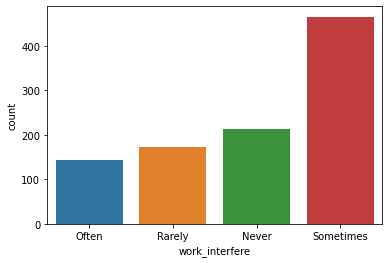

In [9]:
# "Work interfere" and "self employed" have low null values so we replace these values by high percentile value in column
sns.countplot(x='work_interfere', data=df)

In [10]:
df['work_interfere'].fillna("Sometimes", inplace=True)

<AxesSubplot:xlabel='self_employed', ylabel='count'>

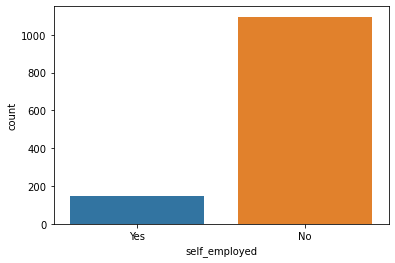

In [11]:
sns.countplot(x='self_employed', data=df)

In [12]:
df['self_employed'].fillna('No', inplace=True)

In [13]:
df.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [14]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

<AxesSubplot:xlabel='Age'>

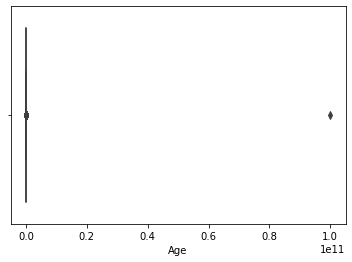

In [15]:
#lot of outliers in Age Columns
sns.boxplot(x='Age', data=df)

In [16]:
df[df['Age'] < 10]

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
143,2014-08-27 12:39:14,-29,Male,United States,No,No,No,Sometimes,More than 1000,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
715,2014-08-28 10:07:53,-1726,male,United Kingdom,No,No,Yes,Sometimes,26-100,No,...,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No
734,2014-08-28 10:35:55,5,Male,United States,No,No,No,Sometimes,100-500,No,...,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",Yes,Yes,Yes,Often,1-5,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1127,2014-08-30 20:55:11,-1,p,United States,Yes,Yes,Yes,Often,1-5,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [17]:
df[df['Age'] > 100]

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
364,2014-08-27 15:05:21,329,Male,United States,No,No,Yes,Often,6-25,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,Yes,Yes,Yes,Often,1-5,No,...,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes


In [18]:
df_new = df.drop(df[df['Age'] < 10].index, axis=0)
df_new = df_new.drop(df[df['Age'] > 100].index, axis=0)
df[df['Age'] < 10] = np.median(df_new['Age'])
df[df['Age'] > 100] = np.median(df_new['Age'])

In [19]:
df.shape

(1259, 25)

<AxesSubplot:xlabel='Age'>

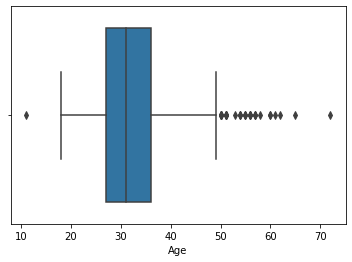

In [20]:
sns.boxplot(x='Age', data=df)

In [21]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 31.0, 'Woman', 'f', 'Mal', 'Male (CIS)',
       'queer/she/they', 'non-binary', 'Femake', 'woman', 'Make', 'Nah',
       'Enby', 'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [22]:
df.drop(df[df['Gender'] == 31.0].index, axis=0, inplace=True)
df['Gender'] = [m.lower() for m in df['Gender']]
df['Gender'].value_counts()

male                                              817
female                                            183
m                                                 150
f                                                  53
make                                                4
woman                                               4
male                                                3
cis male                                            3
female (trans)                                      2
female                                              2
man                                                 2
trans woman                                         1
androgyne                                           1
cis-female/femme                                    1
male leaning androgynous                            1
male-ish                                            1
mail                                                1
cis female                                          1
cis man                     

In [23]:
gender = df['Gender'].str.lower()

In [24]:
gender = df['Gender'].unique()

In [25]:
male_str = ['male', 'm', 'male ', 'mail-ish', 'maile', 'male (cis)',
           'make', 'man', 'msle', 'mail', 'malr', 'cis man',
           'malr', 'Cis Male', 'cis male', 'male-ish', 'mal']
trans_str = ["trans-female", "something kinda male?", "queer/she/they",
             "non-binary","nah", "all", "enby", "fluid", "genderqueer",
             "androgyne", "agender", "male leaning androgynous",
             "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)",
             "queer", "ostensibly male, unsure what that really means"]

female_str = ["cis female", "f", "female", "woman",  "femake", "female ",
              "cis-female/femme", "female (cis)", "femail"]

In [26]:
for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

In [27]:
df['Gender'].unique()

array(['female', 'male', 'trans'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Country'>

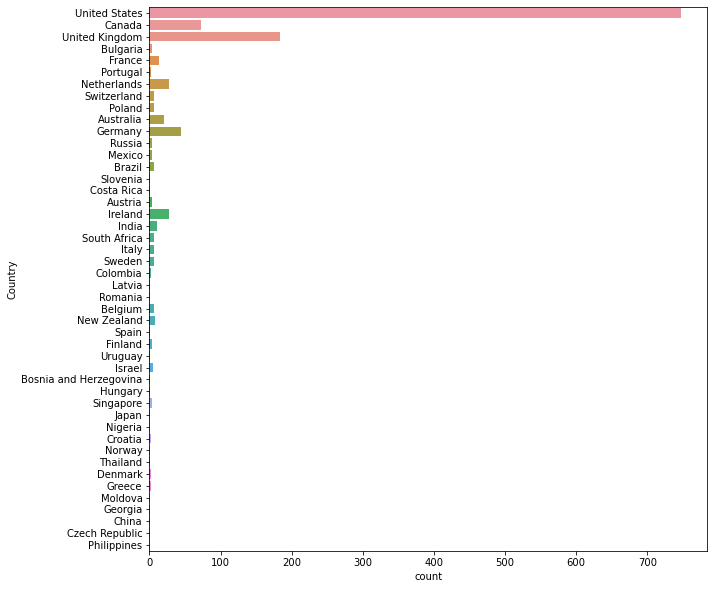

In [28]:
plt.figure(figsize=(10, 10))
sns.countplot(y='Country', data=df)

In [29]:
country = df.groupby(df['Country'])
country['Age'].aggregate(np.mean).sort_values()

Country
Slovenia                  19.000000
Georgia                   20.000000
Russia                    24.000000
India                     24.500000
Bosnia and Herzegovina    25.000000
Israel                    25.000000
Nigeria                   25.000000
Uruguay                   26.000000
Moldova                   26.000000
Austria                   26.666667
Sweden                    26.857143
Colombia                  27.000000
Hungary                   27.000000
Brazil                    27.333333
Bulgaria                  28.250000
Latvia                    29.000000
Romania                   29.000000
Australia                 29.000000
Canada                    29.319444
Finland                   29.333333
Belgium                   29.500000
Switzerland               29.857143
Spain                     30.000000
Germany                   30.422222
Poland                    30.428571
United Kingdom            30.940217
Philippines               31.000000
France              

In [30]:
country['treatment', 'remote_work', 'self_employed'].describe()

C:\Users\Bhavesh kumar\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


treatment                  remote_work              \
                           count unique  top freq       count unique  top   
Country                                                                     
Australia                     21      2  Yes   13          21      2   No   
Austria                        3      1   No    3           3      2  Yes   
Belgium                        6      2   No    5           6      1   No   
Bosnia and Herzegovina         1      1   No    1           1      1  Yes   
Brazil                         6      2   No    4           6      2   No   
Bulgaria                       4      2  Yes    2           4      2  Yes   
Canada                        72      2  Yes   37          72      2   No   
China                          1      1   No    1           1      1  Yes   
Colombia                       2      1   No    2           2      1   No   
Costa Rica                     1      1   No    1           1      1  Yes   
Croatia                        2      1  Yes    2           2      1  Yes   
Czech Republic                 1      1   No    1           1      1   No   
Denmark                        2      1  Yes    2           2      1   No   
Finland                        3      2   No    2           3      2   No   
France                        13      2   No   11          13      2   No   
Georgia                        1      1   No    1           1      1   No   
Germany                       45      2   No   24          45      2   No   
Greece                         2      1   No    2           2      1  Yes   
Hungary                        1      1   No    1           1      1  Yes   
India                         10      2   No    7          10      2   No   
Ireland                       27      2   No   14          27      2   No   
Israel                         5      1   No    5           5      1   No   
Italy                          7      2   No    6           7      1   No   
Japan                          1      1  Yes    1           1      1  Yes   
Latvia                         1      1   No    1           1      1   No   
Mexico                         3      2   No    2           3      2  Yes   
Moldova                        1      1  Yes    1           1      1   No   
Netherlands                   27      2   No   18          27      2   No   
New Zealand                    8      2  Yes    5           8      2   No   
Nigeria                        1      1   No    1           1      1   No   
Norway                         1      1   No    1           1      1   No   
Philippines                    1      1   No    1           1      1   No   
Poland                         7      2  Yes    4           7      2  Yes   
Portugal                       2      1   No    2           2      1   No   
Romania                        1      1   No    1           1      1  Yes   
Russia                         3      1   No    3           3      2   No   
Singapore                      4      2   No    3           4      2  Yes   
Slovenia                       1      1  Yes    1           1      1   No   
South Africa                   6      2  Yes    4           6      2  Yes   
Spain                          1      1   No    1           1      1   No   
Sweden                         7      2   No    5           7      1   No   
Switzerland                    7      2   No    4           7      1   No   
Thailand                       1      1   No    1           1      1   No   
United Kingdom               184      2  Yes   92         184      2   No   
United States                747      2  Yes  408         747      2   No   
Uruguay                        1      1   No    1           1      1  Yes   

                            self_employed                   
                       freq         count unique  top freq  
Country                                                     
Australia                13            21      2   No   19  
Austr

In [31]:
df.groupby(['self_employed'])['treatment'].describe()

,count,unique,top,freq
self_employed,,,,
No,1109,2,Yes,557
Yes,143,2,Yes,75


In [32]:
treat = df.groupby(['treatment'])
treat['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
No,620.0,31.501613,7.009456,11.0,27.0,31.0,35.0,65.0
Yes,632.0,32.607595,7.558193,18.0,27.0,32.0,37.0,72.0


In [33]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [34]:
treat['tech_company', 'work_interfere'].describe()

C:\Users\Bhavesh kumar\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


tech_company                  work_interfere                       
                 count unique  top freq          count unique        top freq
treatment                                                                    
No                 620      2  Yes  516            620      4  Sometimes  365
Yes                632      2  Yes  510            632      4  Sometimes  361

C:\Users\Bhavesh kumar\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='leave'>

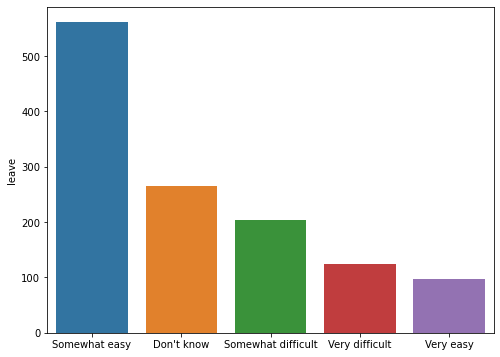

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(df['leave'].unique(), df['leave'].value_counts())

C:\Users\Bhavesh kumar\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='mental_health_consequence'>

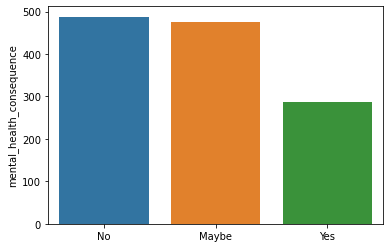

In [36]:
sns.barplot(df['mental_health_consequence'].unique(), df['mental_health_consequence'].value_counts())

C:\Users\Bhavesh kumar\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='phys_health_consequence'>

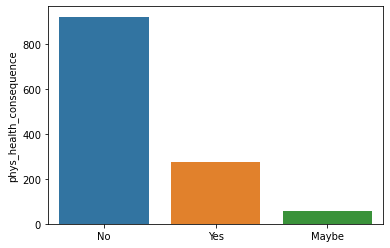

In [37]:
sns.barplot(df['phys_health_consequence'].unique(), df['phys_health_consequence'].value_counts())

([<matplotlib.patches.Wedge at 0x1e9a30b3848>,
 [Text(-0.39403304266209543, 1.0270043628390542, 'Some of them'),
  Text(-0.20850467826278463, -1.0800582387735085, 'No'),
  Text(0.9336971367725636, -0.5815579565122608, 'Yes')])

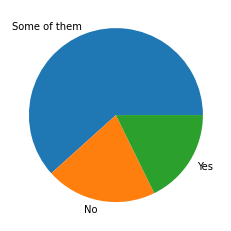

In [38]:
plt.pie(df['coworkers'].value_counts(), labels=df['coworkers'].unique())

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  1252 non-null   object 
 1   Age                        1252 non-null   float64
 2   Gender                     1252 non-null   object 
 3   Country                    1252 non-null   object 
 4   self_employed              1252 non-null   object 
 5   family_history             1252 non-null   object 
 6   treatment                  1252 non-null   object 
 7   work_interfere             1252 non-null   object 
 8   no_employees               1252 non-null   object 
 9   remote_work                1252 non-null   object 
 10  tech_company               1252 non-null   object 
 11  benefits                   1252 non-null   object 
 12  care_options               1252 non-null   object 
 13  wellness_program           1252 non-null   objec

In [40]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [41]:
df['obs_consequence'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
date = pd.to_datetime(df['Timestamp'])

In [43]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1252 non-null   datetime64[ns]
 1   Age                        1252 non-null   float64       
 2   Gender                     1252 non-null   object        
 3   Country                    1252 non-null   object        
 4   self_employed              1252 non-null   object        
 5   family_history             1252 non-null   object        
 6   treatment                  1252 non-null   object        
 7   work_interfere             1252 non-null   object        
 8   no_employees               1252 non-null   object        
 9   remote_work                1252 non-null   object        
 10  tech_company               1252 non-null   object        
 11  benefits                   1252 non-null   object        
 12  care_o

In [45]:
df.to_csv('Cleaned_Mental_health_data.csv', index=False)